In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as pl
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
import pandas

# This bit is for that figure formatting. Change font and font size if desired
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 20}
COLOR = 'black'
rcParams['text.color'] = 'black'
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR

rc('font', **font)

# Lastly this custom colormap is for 
import matplotlib as mpl
upper = mpl.cm.jet(np.arange(256))
lower = np.ones((int(256/4),4))
for i in range(3):
    lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])
cmap = np.vstack(( lower, upper ))
cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

# Even though Boughter & Meier-Schellersheim PLOS Comp Bio 2023 is an AIMS methods manuscript...

While the data should be fairly easy to recreate, for the sake of transparency we go ahead and include all of the clusters from all of the different tested methods in supplemental table S2.

For our clusters we quantify:
- clustered sequences
- Purity of each cluster (maybe average purity?)
- total number of clusters
- average cluster size

AIMS Settings to Look at:

- Left alignment
- Right alignment
- Bulge alignment
- PCA
- DBSCAN
- OPTICS
- KMeans

In [8]:
bulge = pandas.read_csv('../cluster_datasets/bulge_clust.csv')
standard = pandas.read_csv('../cluster_datasets/standard_clusts.csv')
left = pandas.read_csv('../cluster_datasets/left_clust.csv')
right = pandas.read_csv('../cluster_datasets/right_clust.csv')
kmean = pandas.read_csv('../cluster_datasets/kmean_clust.csv')
optics = pandas.read_csv('../cluster_datasets/optics_clust.csv')
pca = pandas.read_csv('../cluster_datasets/pca_clust.csv')
pca_kmean = pandas.read_csv('../cluster_datasets/NEW_clust.csv')
noNorm = pandas.read_csv('../cluster_datasets/noRenorm_clusts.csv')
aimsDist = pandas.read_csv('../cluster_datasets/aimsDist_sim_cluster.csv').sort_values('0')

# Go through one-by-one and change the "data" variable below to get the quantifications of supplemental table S2

In [132]:
data = standard

num_clust = len(data)
totNum = 15000

clustNum = data['0'].sort_values().values[-1]+1
frac_clust = num_clust/totNum

print('Number of Clusters: '+str(clustNum))
print('Fraction Clustered: ' + str(frac_clust))

clust_member = []

a= 0
for i in np.arange(clustNum):
    sub = data[data['0'] == i]

    num_krqn = len(sub[sub['Unnamed: 0'].str.contains('KRQN')])
    num_dehy = len(sub[sub['Unnamed: 0'].str.contains('DEYH')])
    num_Rand = len(sub[sub['Unnamed: 0'].str.contains('Rand')])

    if a == 0:
        save_clusts = [int(num_krqn),int(num_dehy),int(num_Rand)]
        a+=1
    else:
        save_clusts = np.vstack((save_clusts,[int(num_krqn),int(num_dehy),int(num_Rand)]))

    # So this is for keeping a count of who is the primary cluster member
    # faster than testing again later on...
    if num_krqn > num_dehy and num_krqn > num_Rand:
        clust_member = clust_member + ['krqn']
    elif num_dehy > num_krqn and num_dehy > num_Rand:
        clust_member = clust_member + ['dehy']
    elif num_Rand > num_dehy and num_Rand > num_krqn:
        clust_member = clust_member + ['rand']
    else:
        clust_member = clust_member + ['NoDom']

    
fin_frame = np.transpose(pandas.DataFrame(np.vstack([np.transpose(save_clusts),clust_member])))

avg_clust_size = np.average(np.sum(fin_frame[[0,1,2]].values.astype(int),axis=1))
std_clust_size = np.std(np.sum(fin_frame[[0,1,2]].values.astype(int),axis=1))

print('Average Cluster Size: ' + str(avg_clust_size) + ' +/- ' + str(std_clust_size))

krqn_clusts = fin_frame[fin_frame[3] == 'krqn']
dehy_clusts = fin_frame[fin_frame[3] == 'dehy']
rand_clusts = fin_frame[fin_frame[3] == 'rand']

frac_krqn = len(krqn_clusts)
frac_dehy = len(dehy_clusts)
frac_rand = len(rand_clusts)

print('Fraction KRQN Clusts: ' + str(frac_krqn/clustNum))
print('Fraction DEHY Clusts: ' + str(frac_dehy/clustNum))
print('Fraction Random Clusts: ' + str(frac_rand/clustNum))

krqn_avg_purity = np.average(krqn_clusts[0].values.astype(int)/np.sum(krqn_clusts[[0,1,2]].values.astype(int),axis=1))
krqn_std_purity = np.std(krqn_clusts[0].values.astype(int)/np.sum(krqn_clusts[[0,1,2]].values.astype(int),axis=1))

dehy_avg_purity = np.average(dehy_clusts[1].values.astype(int)/np.sum(dehy_clusts[[0,1,2]].values.astype(int),axis=1))
dehy_std_purity = np.std(dehy_clusts[1].values.astype(int)/np.sum(dehy_clusts[[0,1,2]].values.astype(int),axis=1))

rand_avg_purity = np.average(rand_clusts[2].values.astype(int)/np.sum(rand_clusts[[0,1,2]].values.astype(int),axis=1))
rand_std_purity = np.std(rand_clusts[2].values.astype(int)/np.sum(rand_clusts[[0,1,2]].values.astype(int),axis=1))

print('Purity KRQN Clusts: ' + str(krqn_avg_purity)+ ' +/- '+str(krqn_std_purity))
print('Purity DEHY Clusts: ' + str(dehy_avg_purity)+ ' +/- '+str(dehy_std_purity))
print('Purity Random Clusts: ' + str(rand_avg_purity)+ ' +/- '+str(rand_std_purity))

Number of Clusters: 417
Fraction Clustered: 0.26126666666666665
Average Cluster Size: 9.398081534772182 +/- 8.439929998633952
Fraction KRQN Clusts: 0.4412470023980815
Fraction DEHY Clusts: 0.44364508393285373
Fraction Random Clusts: 0.05515587529976019
Purity KRQN Clusts: 0.9074475567890319 +/- 0.13476281198632076
Purity DEHY Clusts: 0.8896391689485839 +/- 0.14076581042130956
Purity Random Clusts: 0.686306717803218 +/- 0.16999386550955844


# Alright then to compare to GLIPH and TCRdist we need to do things a little differently
The outputs are a little funky for clustering, so we need to use dendograms to cluster TCRdist sequences and motifs to cluster GLIPH.

GLIPH *does* have clustering functionality, but I needed to kill the job because it was taking far too long to run

# Also, important to note for the TCRdist that I can't include the raw data, too large (~0.5GB)

But I'll still include the code used to analyze the output distance matrix, and also include the TCRs so that you could theoretically recalculate the same distance matrix

In [14]:
#dist_mat = np.load('../cluster_datasets/sim_tcrdist.npy')
seq_df = np.transpose(pandas.read_csv('../cluster_datasets/simTCRs.csv'))

col = ['Rand']*5000 + ['KRQN']*5000 + ['DEYH']*5000

#dist_df = pandas.DataFrame(dist_mat)
#dist_df.columns = col
seq_df.columns = col

# Scipy very nicely has some modules for generating these dendrograms and identifying distance based clusters

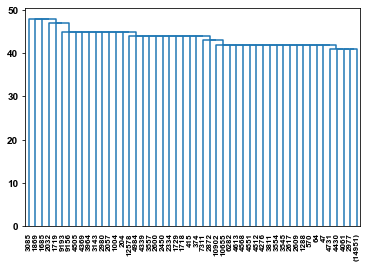

In [16]:
# Visualize the dendrograms first to know that you did things roughly right:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

mat= dist_mat
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")

import sys
sys.setrecursionlimit(10000)
dend2 = dendrogram(linkage_matrix,truncate_mode='lastp',p=50)  # show only the last p merged clusters)

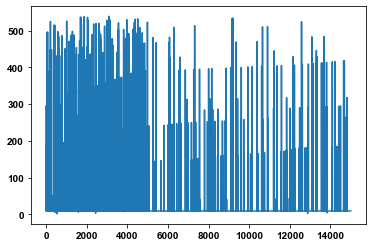

In [26]:
# Then, check to see how many clusters you are making depending on the "max_d" you choose
from scipy.cluster.hierarchy import fcluster
max_d = 30
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
pl.plot(clusters)

# And now the creation of this "tcrDist_final" can be input back above as the "data" variable for generating the table metrics

I could go ahead and create a function out of this, but there really isn't much need to clean things up. I don't think these metrics are particularly useful, the reviewer just asked for them.

In [34]:
# we aren't "re-running" this analysis typically because the tcrDist matrix is hard to share
rerun = False
if rerun:
    tcrDist_df = pandas.DataFrame(clusters)
    tcrDist_df.columns = ['0']
    colDF = pandas.DataFrame(col)
    colDF.columns = ['Unnamed: 0']

    tcrDist_final = pandas.concat([colDF,tcrDist_df],axis=1)
else:
    tcrDist_final = pandas.read_csv('../cluster_datasets/tcrdist_clust.csv')

# The last thing we do is try to squeeze out these metrics from GLIPH
Probably the hardest to do this for, because again the clustering was far too slow and the motifs are *very* degenerate, as discussed in the text of this manuscript

In [69]:
gg = pandas.read_csv('../cluster_datasets/sim_gliph_motifs.csv',sep='\t')
# Only count motifs longer than 3 amino acids
long = gg[gg['Motif'].str.len() > 3]
# Only count motifs with more than 10 sequences
gClust = long[long['Counts'] > 10]

# The doubel reset index is a little wonky, but it adds numbers and the dset in as variables
finDF = np.transpose(seq_df).reset_index().reset_index()
finDF.columns = ['Index','dset','seq']

In [104]:
a = 0 
for i in gClust['Motif'].values:
    sub = finDF[finDF['seq'].str.contains(i)]
    # Need to save index to look for duplicates
    index_temp = sub['Index'].values
    clustID = pandas.DataFrame([a]*len(sub))
    tempDF = pandas.concat([sub['dset'].reset_index(),pandas.DataFrame(clustID)],axis=1)
    if a == 0:
        indices = index_temp
        gliphFF = tempDF
    else:
        indices = np.hstack((indices,index_temp))
        gliphFF = pandas.concat([gliphFF,tempDF],axis=0)
    a += 1 
gliphFF.columns = ['index','Unnamed: 0','0']

# DropDups should be the final dataframe that you put into the "data" variable above

In [133]:
pre_dropDups = gliphFF.reset_index()
# This is how we get the gliph clusters in the paper - remove *all* sequences in multiple clusters
gliph_dropDups = pre_dropDups[~pre_dropDups['index'].duplicated(keep=False)]
# This is how you could also do it, keep only the first instance of a clustered sequence.
# Even if you're "nicer" to GLIPH here, still only ~40% of sequences get clustered
gliph_dropDups_kinder = pre_dropDups.loc[pre_dropDups['index'].drop_duplicates().index]